In [1]:
import pandas as pd
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import plotly.express as px

from wordcloud import WordCloud

import keras
from keras.initializers import Constant
from keras.models import Sequential
from keras.layers import Embedding, Flatten, LSTM, Bidirectional, SimpleRNN
from keras.layers import GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from gensim.models import fasttext
from gensim.test.utils import datapath
from gensim.models import KeyedVectors

import spacy

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 22.7 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 8.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = "/content/drive/My Drive/Ryanair_reviews.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,...,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,...,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,...,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,...,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,...,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


In [5]:
df = df[['Date Published', 'Overall Rating', 'Comment','Passenger Country']]
df = df.rename(columns={'Date Published': 'Date', 'Overall Rating': 'Rating', 'Comment': 'Review', 'Passenger Country' : 'Nation'})
df.head()

,Date,Rating,Review,Nation
0,2024-02-03,10.0,Flew back from Faro to London Luton Friday 2nd...,United Kingdom
1,2024-01-26,10.0,Another good affordable flight with Ryanair. O...,United Kingdom
2,2024-01-20,10.0,"Really impressed! You get what you pay for, th...",United Kingdom
3,2024-01-07,6.0,I should like to review my flight from Faro to...,United Kingdom
4,2024-01-06,10.0,"Flight left the gate ahead of schedule, fare w...",Israel


In [5]:
from google.colab import files

uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving Europe_merged.shp to Europe_merged.shp


Saving Europe_merged.shx to Europe_merged.shx


Saving Europe_merged.dbf to Europe_merged.dbf


In [6]:
import geopandas as gpd

shapefile_path = "Europe_merged.shp"
europe_countries = gpd.read_file(shapefile_path)

print(europe_countries.head())

  GID_0   COUNTRY                                           geometry
0   ALB   Albania  MULTIPOLYGON (((20.05408 39.69171, 20.03888 39...
1   BEL   Belgium  MULTIPOLYGON (((5.46629 49.49893, 5.46450 49.5...
2   BGR  Bulgaria  MULTIPOLYGON (((25.12868 41.32243, 25.12824 41...
3   HRV   Croatia  MULTIPOLYGON (((16.80109 42.74768, 16.80125 42...
4   CYP    Cyprus  MULTIPOLYGON (((33.67944 35.03390, 33.68500 35...


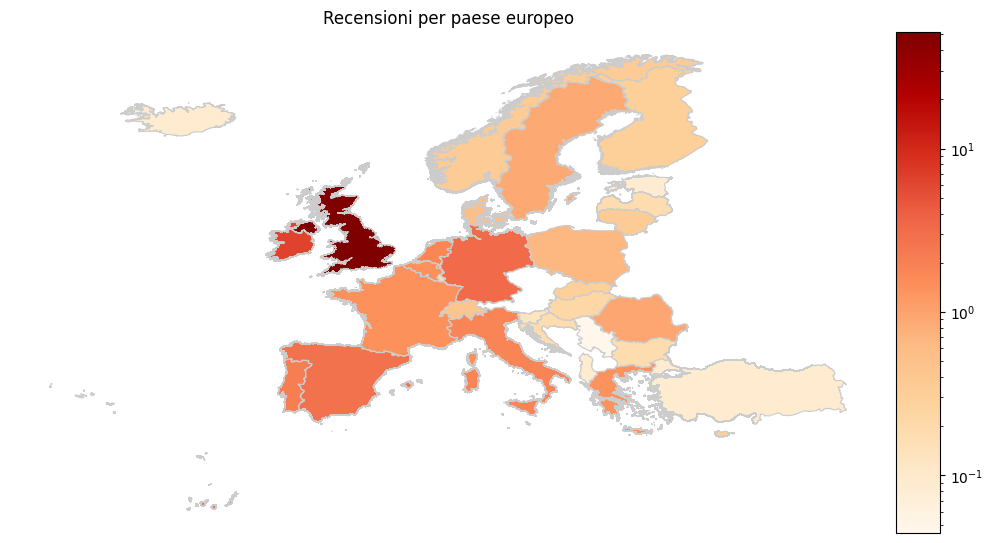

In [7]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

shapefile_path = "Europe_merged.shp"
europe_countries = gpd.read_file(shapefile_path)

countries_reviews = df.groupby('Nation').size().reset_index(name='Reviews')
countries_reviews['Percent_Reviews'] = countries_reviews['Reviews'] / countries_reviews['Reviews'].sum() * 100

merged = europe_countries.merge(countries_reviews, how='left', left_on='COUNTRY', right_on='Nation')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

norm = LogNorm(vmin=merged['Percent_Reviews'].min(), vmax=merged['Percent_Reviews'].max())

merged.plot(column='Percent_Reviews', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm, cax=cax)
ax.axis('off')
ax.set_title('Recensioni per paese europeo')
plt.show()

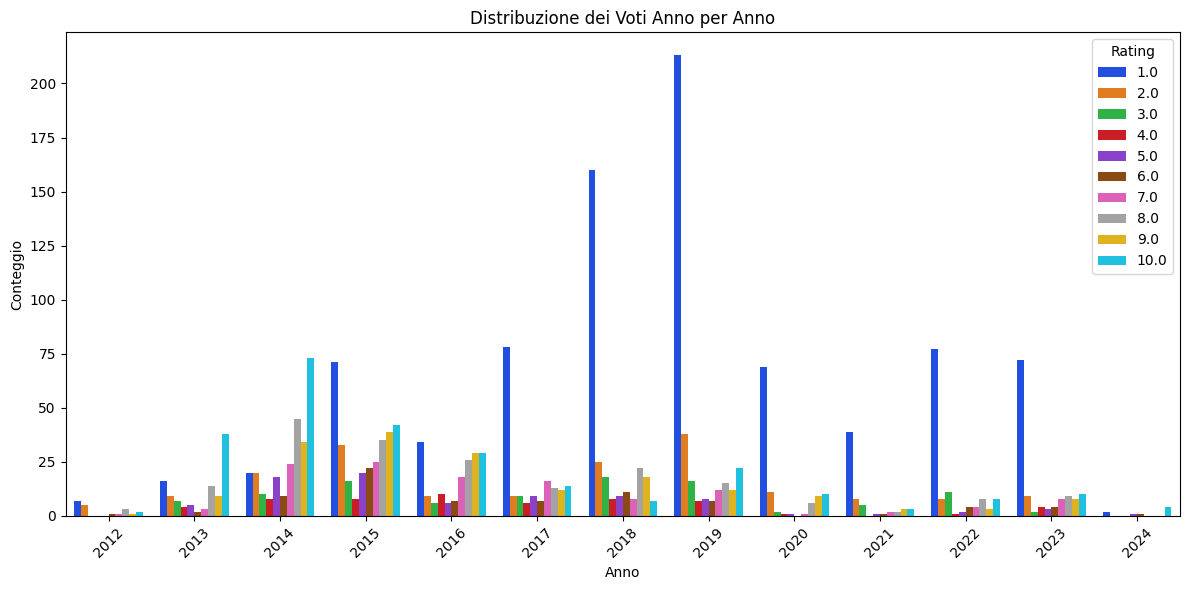

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Rating', data=df, palette='bright')
plt.title('Distribuzione dei Voti Anno per Anno')
plt.xlabel('Anno')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
df = df.drop(columns=['Date'])

df = df[~df['Year'].isin([2024])]

print(df['Year'].unique())

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012]


In [8]:
null_columns = df.columns[df.isnull().any()]
num_null_columns = len(null_columns)
print("Il numero totale di colonne con valori nulli è:", num_null_columns)

if num_null_columns > 0:
    print("Le colonne con valori nulli sono:")
    for column in null_columns:
        num_null_values = df[column].isnull().sum()
        print(f"{column}: {num_null_values} valori nulli")

Il numero totale di colonne con valori nulli è: 1
Le colonne con valori nulli sono:
Rating: 130 valori nulli


In [9]:
df.dropna(subset=['Rating'], inplace=True)
print(df.isnull().values.any())

False


In [10]:
df['Sentiment'] = df['Rating'].apply(lambda x: 0 if x <= 5 else 1)
df.head()

,Rating,Review,Nation,Year,Sentiment
8,1.0,Ryanair ground service staff is really bad. If...,United Kingdom,2023,0
9,1.0,I wanted to check in online a night before our...,Germany,2023,0
10,8.0,"Krakow to Tirana with Ryanair's subsidiary, Bu...",Albania,2023,1
11,1.0,This airline charges you for almost every thin...,Singapore,2023,0
12,3.0,At least 5 passengers denied boarding in Lisbo...,Portugal,2023,0


<ipython-input-13-0808bcfedbdc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette=['red', 'blue'])


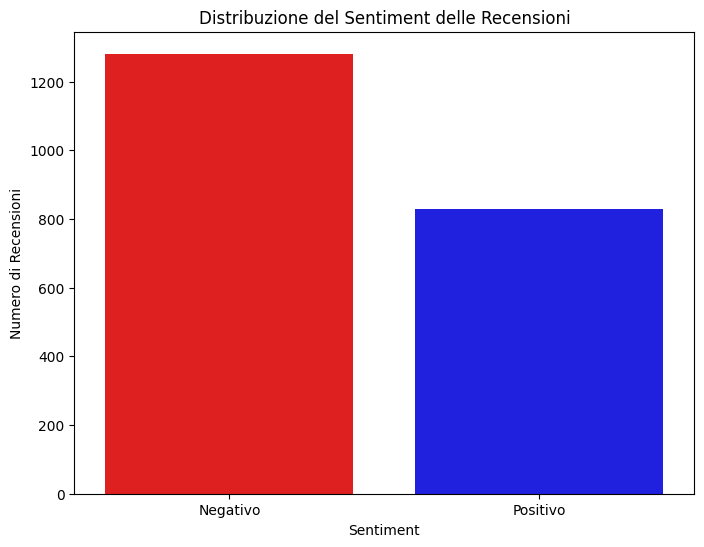

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette=['red', 'blue'])
plt.title('Distribuzione del Sentiment delle Recensioni')
plt.xlabel('Sentiment')
plt.ylabel('Numero di Recensioni')
plt.xticks([0, 1], ['Negativo', 'Positivo'])
plt.show()

In [11]:
df['Sentiment'].value_counts()

Sentiment
0    1281
1     830
Name: count, dtype: int64

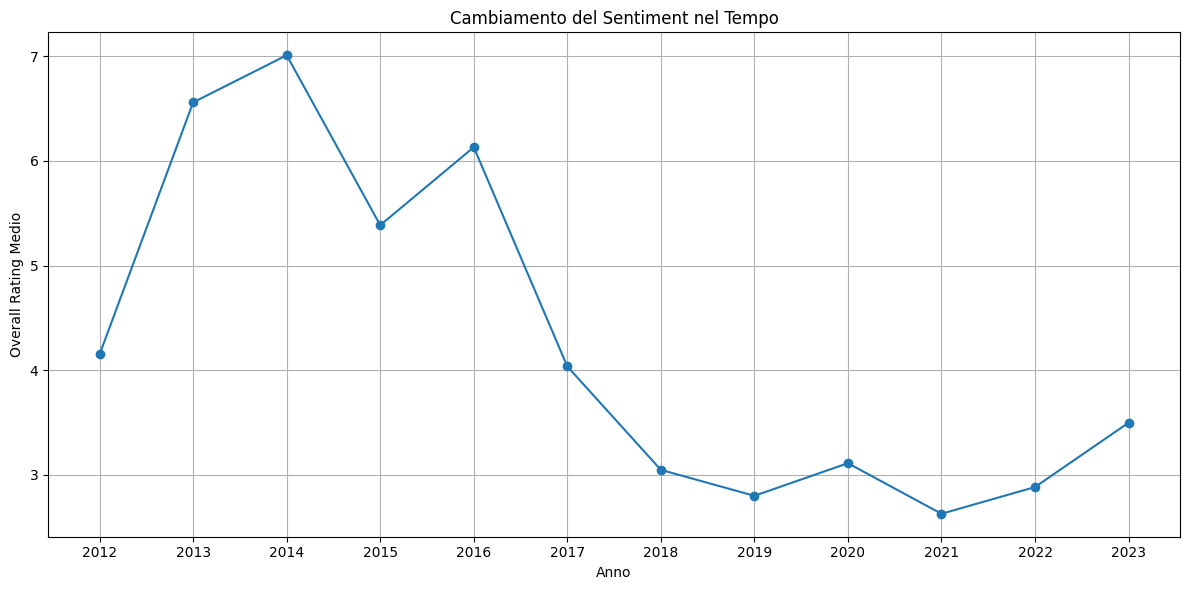

In [15]:
# Raggruppa per anno e calcola la media del 'Overall Rating'
sentiment_over_time = df.groupby(df['Year'])['Rating'].mean()

plt.figure(figsize=(12, 6))
sentiment_over_time.plot(marker='o')
plt.title('Cambiamento del Sentiment nel Tempo')
plt.xlabel('Anno')
plt.ylabel('Overall Rating Medio')
plt.xticks(sentiment_over_time.index)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Calcola la soggettività di ciascuna recensione nel dataset
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Calcola la polarità di ciascuna recensione nel dataset
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Review'].apply(subjectivity)
df['Polarity'] = df['Review'].apply(polarity)

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Applica la funzione getAnalysis alla colonna di polarità per ottenere l'analisi
df['Analysis'] = df['Polarity'].apply(getAnalysis)

color_map = {'Negative': 'red', 'Neutral': '#7FFFD4', 'Positive': 'blue'}

fig = px.scatter(df,
                 x='Polarity',
                 y='Subjectivity',
                 color='Analysis',
                 size='Subjectivity',
                 color_discrete_map=color_map,
                 title='Sentiment Analysis')

# Aggiungi linea verticale per rappresentare le recensioni neutre
fig.update_layout(shapes=[dict(type='line', yref='paper', y0=0, y1=1, xref='x', x0=0, x1=0)])

fig.show()

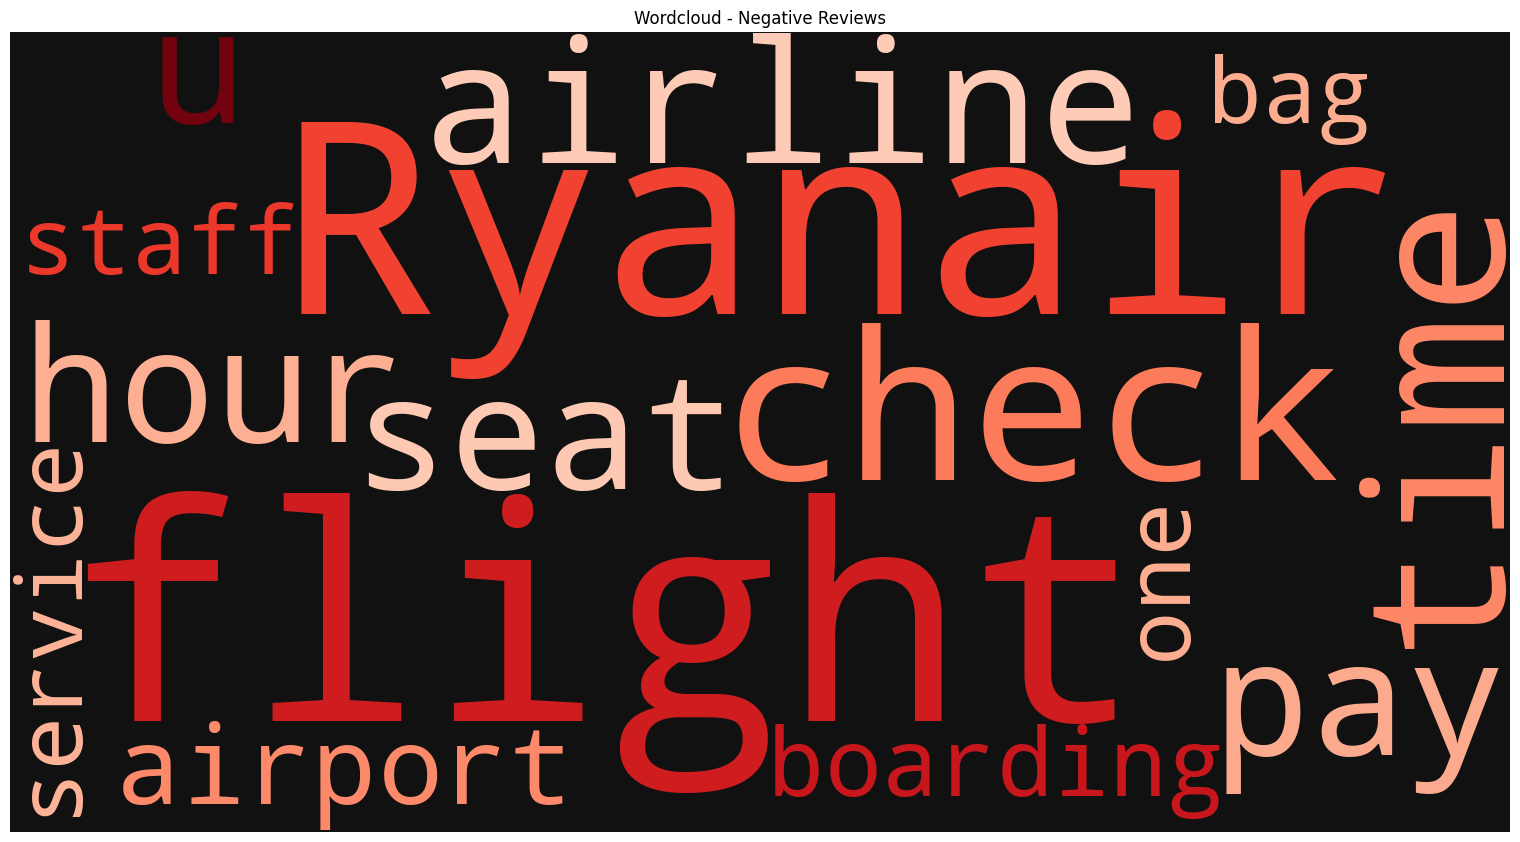

In [17]:
stop_words = set(stopwords.words('english'))

def wordcloud(text, title, background_color, color, max_words=15):
    wordcloud = WordCloud(width=1500, height=800,
                          background_color=background_color,
                          stopwords=stop_words,
                          min_font_size=10, colormap=color, max_words=max_words,
                          collocations=False).generate(text)

    # Visualizza wordcloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)

    plt.show()

# Concatena tutte le recensioni in un'unica stringa per recensioni negative
negative_reviews = ' '.join(df[df['Sentiment'] == 0]['Review'])

# Genera wordcloud per le recensioni negative
wordcloud(negative_reviews, "Wordcloud - Negative Reviews", '#111111', 'Reds')

In [12]:
# Funzione per pulire e pre-elaborare il testo.
def clean_reviews(review, custom_stopwords=[]):

    review = re.sub("[^a-zA-Z]"," ", review)

    word_tokens = review.lower().split()

    le = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    stop_words.update(custom_stopwords)
    word_tokens = [le.lemmatize(w) for w in word_tokens if not w in stop_words]

    cleaned_review = " ".join(word_tokens)
    return cleaned_review

In [13]:
custom_stopwords = ['ryanair', 'flight']

In [14]:
df['Review'] = df['Review'].apply(lambda x: clean_reviews(x, custom_stopwords))

In [15]:
df['Review_Length'] = df['Review'].apply(lambda x: len(x.split()))

average_review_length = df['Review_Length'].mean()
print("Lunghezza media delle recensioni:", average_review_length)

Lunghezza media delle recensioni: 59.52676456655613


In [16]:
ft = '/content/drive/MyDrive/wiki-news-300d-1M.vec'

In [17]:
word_vectors = {}
with open(ft, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.strip().split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        word_vectors[word] = vector

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

max_sequence_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

X = padded_sequences
y = df['Sentiment']

In [19]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_dim = 300

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import pickle

# Salva il tokenizer
with open("/content/drive/MyDrive/tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [27]:
def plot_history(history):

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [28]:
def evaluate_model(model, X_test, y_test, threshold=0.5):

    y_pred_prob = model.predict(X_test)

    y_pred = (y_pred_prob > threshold).astype(int)

    y_test_labels = ["negative" if label == 0 else "positive" for label in y_test]
    y_pred_labels = ["negative" if label == 0 else "positive" for label in y_pred]

    report = classification_report(y_test_labels, y_pred_labels)

    return report

In [29]:
# Definizione del modello RNN
def create_rnn_model(embedding_matrix, max_sequence_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
    model.add(SimpleRNN(units=32, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Definizione del modello LSTM
def create_lstm_model(embedding_matrix, max_sequence_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
    model.add(LSTM(units=64, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model


def create_blstm_model(embedding_matrix, max_sequence_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_matrix.shape[1], weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
    model.add(Bidirectional(LSTM(units=64, activation='tanh')))
    model.add(Dropout(0.6))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [30]:
rnn_model = create_rnn_model(embedding_matrix, max_sequence_length, vocab_size)
lstm_model = create_lstm_model(embedding_matrix, max_sequence_length, vocab_size)
blstm_model = create_blstm_model(embedding_matrix, max_sequence_length, vocab_size)

In [31]:
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          2341800   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                10656     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 2352489 (8.97 MB)
Trainable params: 10689 (41.75 KB)
Non-trainable params: 2341800 (8.93 MB)
_________________________________________________________________


In [32]:
history_rnn = rnn_model.fit(X_train, y_train, epochs=10, batch_size=40, validation_data=(X_test, y_test))

Epoch 1/10
43/43 [==============================] - 8s 76ms/step - loss: 0.7016 - accuracy: 0.5646 - val_loss: 0.6759 - val_accuracy: 0.5816
Epoch 2/10
43/43 [==============================] - 3s 67ms/step - loss: 0.6298 - accuracy: 0.6422 - val_loss: 0.5561 - val_accuracy: 0.7825
Epoch 3/10
43/43 [==============================] - 3s 67ms/step - loss: 0.4983 - accuracy: 0.7826 - val_loss: 0.4326 - val_accuracy: 0.8463
Epoch 4/10
43/43 [==============================] - 6s 135ms/step - loss: 0.3898 - accuracy: 0.8513 - val_loss: 0.3532 - val_accuracy: 0.8723
Epoch 5/10
43/43 [==============================] - 3s 69ms/step - loss: 0.3496 - accuracy: 0.8679 - val_loss: 0.3545 - val_accuracy: 0.8629
Epoch 6/10
43/43 [==============================] - 3s 67ms/step - loss: 0.3204 - accuracy: 0.8797 - val_loss: 0.3702 - val_accuracy: 0.8605
Epoch 7/10
43/43 [==============================] - 3s 67ms/step - loss: 0.3020 - accuracy: 0.8863 - val_loss: 0.3469 - val_accuracy: 0.8794
Epoch 8/10
4

In [33]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          2341800   
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2435305 (9.29 MB)
Trainable params: 93505 (365.25 KB)
Non-trainable params: 2341800 (8.93 MB)
_________________________________________________________________


In [34]:
history_lstm = lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
27/27 [==============================] - 4s 41ms/step - loss: 0.6588 - accuracy: 0.6007 - val_loss: 0.6207 - val_accuracy: 0.5887
Epoch 2/10
27/27 [==============================] - 0s 14ms/step - loss: 0.4859 - accuracy: 0.7672 - val_loss: 0.4327 - val_accuracy: 0.8440
Epoch 3/10
27/27 [==============================] - 0s 12ms/step - loss: 0.3861 - accuracy: 0.8377 - val_loss: 0.3862 - val_accuracy: 0.8322
Epoch 4/10
27/27 [==============================] - 0s 13ms/step - loss: 0.3297 - accuracy: 0.8774 - val_loss: 0.3530 - val_accuracy: 0.8369
Epoch 5/10
27/27 [==============================] - 0s 14ms/step - loss: 0.2854 - accuracy: 0.8940 - val_loss: 0.3157 - val_accuracy: 0.8889
Epoch 6/10
27/27 [==============================] - 0s 13ms/step - loss: 0.2571 - accuracy: 0.9046 - val_loss: 0.3063 - val_accuracy: 0.8818
Epoch 7/10
27/27 [==============================] - 0s 9ms/step - loss: 0.2586 - accuracy: 0.9028 - val_loss: 0.3644 - val_accuracy: 0.8511
Epoch 8/10
27/

In [35]:
blstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
blstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          2341800   
                                                                 
 bidirectional (Bidirection  (None, 128)               186880    
 al)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2528809 (9.65 MB)
Trainable params: 187009 (730.50 KB)
Non-trainable params: 2341800 (8.93 MB)
_________________________________________________________________


In [36]:
history_blstm = blstm_model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/10
17/17 [==============================] - 5s 75ms/step - loss: 0.6585 - accuracy: 0.6120 - val_loss: 0.6399 - val_accuracy: 0.5816
Epoch 2/10
17/17 [==============================] - 0s 17ms/step - loss: 0.5545 - accuracy: 0.7103 - val_loss: 0.5159 - val_accuracy: 0.8061
Epoch 3/10
17/17 [==============================] - 0s 16ms/step - loss: 0.5024 - accuracy: 0.7749 - val_loss: 0.4653 - val_accuracy: 0.8038
Epoch 4/10
17/17 [==============================] - 0s 14ms/step - loss: 0.4404 - accuracy: 0.8110 - val_loss: 0.3837 - val_accuracy: 0.8700
Epoch 5/10
17/17 [==============================] - 0s 14ms/step - loss: 0.3834 - accuracy: 0.8572 - val_loss: 0.3316 - val_accuracy: 0.8913
Epoch 6/10
17/17 [==============================] - 0s 16ms/step - loss: 0.3320 - accuracy: 0.8744 - val_loss: 0.3076 - val_accuracy: 0.8865
Epoch 7/10
17/17 [==============================] - 0s 14ms/step - loss: 0.3008 - accuracy: 0.8898 - val_loss: 0.2912 - val_accuracy: 0.8794
Epoch 8/10
17

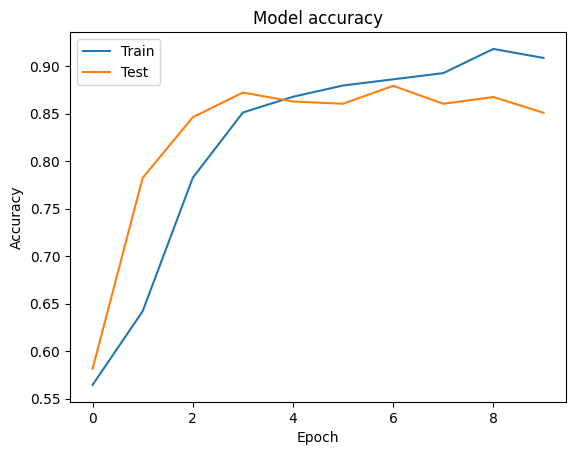

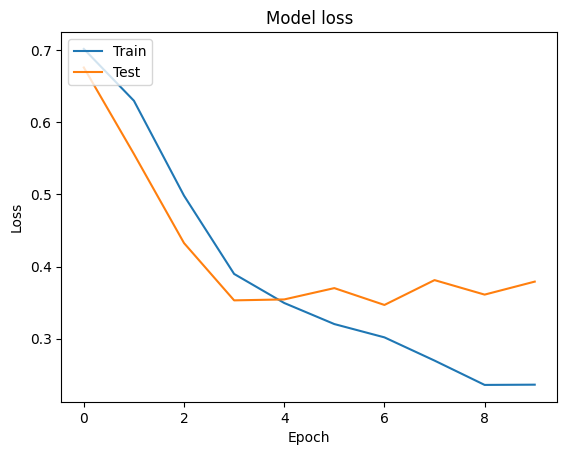

In [37]:
plot_history(history_rnn)

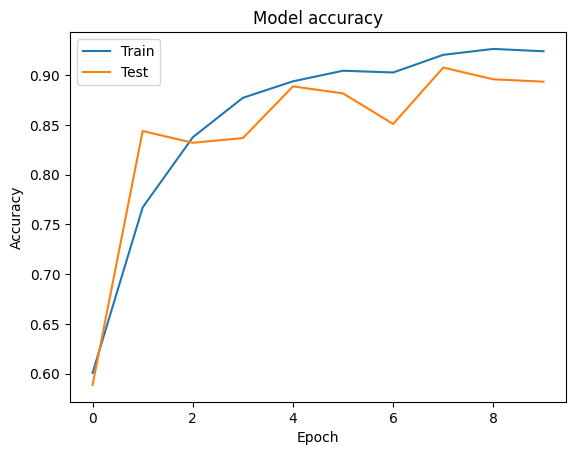

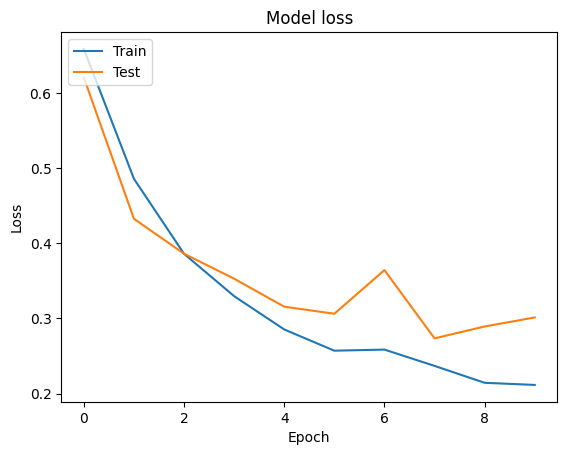

In [38]:
plot_history(history_lstm)

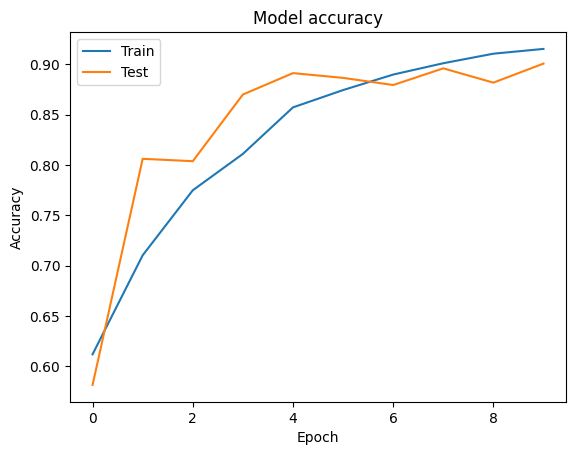

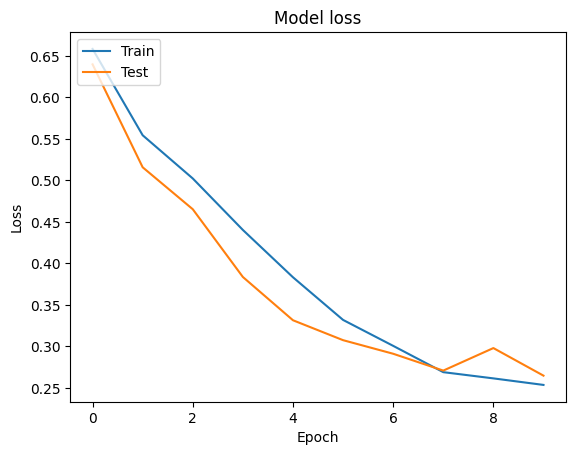

In [39]:
plot_history(history_blstm)

In [40]:
# Valutazione del modello RNN
classification_report_rnn = evaluate_model(rnn_model, X_test, y_test)
print("RNN Classification Report:")
print(classification_report_rnn)

14/14 [==============================] - 0s 14ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.91      0.87       243
    positive       0.86      0.78      0.82       180

    accuracy                           0.85       423
   macro avg       0.85      0.84      0.85       423
weighted avg       0.85      0.85      0.85       423



In [41]:
# Valutazione del modello LSTM
classification_report_lstm = evaluate_model(lstm_model, X_test, y_test)
print("LSTM Classification Report:")
print(classification_report_lstm)

14/14 [==============================] - 1s 5ms/step
LSTM Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.89      0.91       243
    positive       0.86      0.90      0.88       180

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.90      0.89      0.89       423



In [42]:
# Valutazione del modello BLSTM
classification_report_blstm = evaluate_model(blstm_model, X_test, y_test)
print("BLSTM Classification Report:")
print(classification_report_blstm)

14/14 [==============================] - 1s 7ms/step
BLSTM Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.94      0.92       243
    positive       0.91      0.85      0.88       180

    accuracy                           0.90       423
   macro avg       0.90      0.89      0.90       423
weighted avg       0.90      0.90      0.90       423



In [19]:
# Filtra solo le recensioni negative
df_neg = df[df['Sentiment'] == 0]

df_neg = df_neg[['Year', 'Review']]

df_neg.reset_index(drop=True, inplace=True)

print(df_neg)

      Year                                             Review
0     2023  ground service staff really bad problem never ...
1     2023  wanted check online night nationality listed w...
2     2023  airline charge almost every thing every child ...
3     2023  least passenger denied boarding lisbon due ove...
4     2023  tenth year eight flight delay usually one two ...
...    ...                                                ...
1276  2012  daughter took holiday ko never seen shamble li...
1277  2012  stansted pula tried adhere rule regulation fai...
1278  2012  printing boarding ticket got outboard problem ...
1279  2012  budapest manchester back month old year old bu...
1280  2012  stansted barcelona fine going horrendous treat...

[1281 rows x 2 columns]


In [37]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Prendi solo la colonna 'Review' per l'analisi
docs = df_neg['Review']

# Carica il modello RoBERTa
roberta_model = SentenceTransformer('roberta-base')

# Inizializza e addestra il modello BERTopic con RoBERTa
topic_model = BERTopic(verbose=True, embedding_model=roberta_model, min_topic_size=15)
topics, _ = topic_model.fit_transform(docs)

# Stampa le informazioni sui topic
print(len(topic_model.get_topic_info()))

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-05-12 15:50:24,915 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/41 [00:00<?, ?it/s]

2024-05-12 15:50:32,599 - BERTopic - Embedding - Completed ✓
2024-05-12 15:50:32,600 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-12 15:50:39,243 - BERTopic - Dimensionality - Completed ✓
2024-05-12 15:50:39,245 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-12 15:50:39,300 - BERTopic - Cluster - Completed ✓
2024-05-12 15:50:39,308 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-12 15:50:39,384 - BERTopic - Representation - Completed ✓


5


In [38]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,344,-1_seat_airline_check_time,"[seat, airline, check, time, pay, airport, sta...",[hamburg dublin fly twice week week year going...
1,0,592,0_airline_check_time_hour,"[airline, check, time, hour, pay, seat, staff,...",[flew oslo london stansted worst airline ever ...
2,1,166,1_check_time_bag_service,"[check, time, bag, service, customer, pay, air...",[worst airline ever deal super incompetent unf...
3,2,115,2_check_time_told_get,"[check, time, told, get, would, hour, customer...",[berlin madrid explaining bad experience airli...
4,3,64,3_hour_airport_plane_one,"[hour, airport, plane, one, delay, time, check...",[delayed hour redirected another city berlin a...


In [39]:
topic_model.get_topic(0)

[('airline', 0.03893348445482732),
 ('check', 0.03758615796885512),
 ('time', 0.03562950495163917),
 ('hour', 0.03421754105993395),
 ('pay', 0.03314885291811515),
 ('seat', 0.029593899604969356),
 ('staff', 0.02609538499154053),
 ('airport', 0.02597727005925869),
 ('boarding', 0.025930642060315923),
 ('never', 0.025767010045918703)]

In [40]:
topic_model.visualize_barchart(top_n_topics=8, height=700)

In [41]:
topic_model.visualize_topics(top_n_topics=15)

In [42]:
topics_over_time = topic_model.topics_over_time(docs=docs,
                                                timestamps=df_neg['Year'],
                                                global_tuning=True,
                                                evolution_tuning=True,
                                                nr_bins=20)

12it [00:00, 40.74it/s]


In [44]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=8, width=1000, height=500)